# Module 11 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [2]:
# Scraping
from splinter import Browser
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager

# requests
import requests
import time

# parsing
from bs4 import BeautifulSoup

# data science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Open a Chrome window using Splinter
my_service = Service(executable_path=ChromeDriverManager().install())
browser = Browser('chrome', service=my_service)

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Chrome DevTools to discover whether the table contains usable classes.


In [5]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = "https://static.bc-edx.com/data/web/mars_facts/temperature.html"
browser.visit(url)

In [6]:
# Save the HTML from the browser
html = browser.html

# Create a BeautifulSoup object from the HTML
soup = BeautifulSoup(html, 'html.parser')


### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [8]:
# Extract all rows of data

table = soup.find("table", {"class":"table"})



### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [10]:
dfs = pd.read_html(str(table))
df = dfs[0]

df

C:\Users\kimkh\AppData\Local\Temp\ipykernel_496\1177066096.py:1: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  dfs = pd.read_html(str(table))


,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0
...,...,...,...,...,...,...,...
1862,1889,2018-02-23,1973,133,5,-78.0,730.0
1863,1892,2018-02-24,1974,134,5,-77.0,729.0
1864,1894,2018-02-25,1975,134,5,-76.0,729.0
1865,1893,2018-02-26,1976,135,5,-77.0,728.0


In [11]:
# Attempt1:
# Create an empty list
# # Loop through the scraped data to create a list of rows

# rows = []

# table_rows = table.find_all("tr", {"class":"data-row"})
# for table_row in table_rows[0:10]:
#     id = table_row.find_all("td")[0].text
#     terrestrial_date = table_row.find_all("td")[1].text
#     sol =table_row.find_all("td")[2].text
#     ls = table_row.find_all("td")[3].text
#     month = table_row.find_all("td")[4].text
#     min_temp = table_row.find_all("td")[5].text
#     pressure = table_row.find_all("td")[6].text
#     print(id, terrestrial_date, sol, ls, month, min_temp, pressure)
# # create a dictionary 
#     row = {
#         "num of single transmission": id,
#         "the date on Earth":terrestrial_date,
#         "Martian days" : sol,
#         "the solar longitude": ls,
#         # "the Martian month": month,
#         "the minimum temperature": min_temp,
#         "The atmospheric pressure": pressure
#    }
#     rows.append(row)

# # Create a Pandas DataFrame by using the list of rows and a list of the column names
# df = pd.DataFrame(rows)
# # Confirm DataFrame was created successfully
# df

In [12]:
# # Rename columns to match the expected names
# df.columns = ['num of single transmission', 'date on Earth', 'Martian days', 'solar longitude', 'Martian month', 'minimum temperature', 'atmospheric pressure']
# df.head()


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [14]:
# Examine data type of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                1867 non-null   int64  
 1   terrestrial_date  1867 non-null   object 
 2   sol               1867 non-null   int64  
 3   ls                1867 non-null   int64  
 4   month             1867 non-null   int64  
 5   min_temp          1867 non-null   float64
 6   pressure          1867 non-null   float64
dtypes: float64(2), int64(4), object(1)
memory usage: 102.2+ KB


In [15]:
# Change data types for data analysis
df['terrestrial_date'] = pd.to_datetime(df['terrestrial_date'])

# Convert 'sol', 'ls', 'month' to int
df['sol'] = df['sol'].astype(int)
df['ls'] = df['ls'].astype(int)
df['month'] = df['month'].astype(int)

# Convert 'min_temp' and 'pressure' to float
df['min_temp'] = df['min_temp'].astype(float)
df['pressure'] = df['pressure'].astype(float)

# # Convert 'sol', 'ls', 'month' to int
# df['Martian days'] = df['Martian days'].astype(int)
# df['solar longitude'] = df['solar longitude'].astype(int)
# df['Martian month'] = df['Martian month'].astype(int)

# # Convert 'min_temp' and 'pressure' to float
# df['minimum temperature'] = df['minimum temperature'].astype(float)
# df['atmospheric pressure'] = df['atmospheric pressure'].astype(float)

# Check the data types
print(df.dtypes)

id                           int64
terrestrial_date    datetime64[ns]
sol                          int64
ls                           int64
month                        int64
min_temp                   float64
pressure                   float64
dtype: object


In [16]:
# Confirm type changes were successful by examining data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1867 entries, 0 to 1866
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                1867 non-null   int64         
 1   terrestrial_date  1867 non-null   datetime64[ns]
 2   sol               1867 non-null   int64         
 3   ls                1867 non-null   int64         
 4   month             1867 non-null   int64         
 5   min_temp          1867 non-null   float64       
 6   pressure          1867 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 102.2 KB


### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [18]:
# 1. How many months are there on Mars?
# num_months = df['Martian month'].nunique()
num_months = df['month'].nunique()
print(f'There are {num_months} months on Mars.')

There are 12 months on Mars.


In [19]:
# 2. How many sols (Martian days) worth of data are there?
num_martian_days = df['sol'].nunique()
print(f'There are {num_martian_days} Martian days in the dataset.')

There are 1867 Martian days in the dataset.


In [20]:
# 3. What is the average minimum temperature by month?
avg_min_temp = df.groupby('month')['min_temp'].mean()
print(f'The average minimum temperature by month {avg_min_temp}.')

The average minimum temperature by month month
1    -77.160920
2    -79.932584
3    -83.307292
4    -82.747423
5    -79.308725
6    -75.299320
7    -72.281690
8    -68.382979
9    -69.171642
10   -71.982143
11   -71.985507
12   -74.451807
Name: min_temp, dtype: float64.


In [21]:
df.head(1)

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0


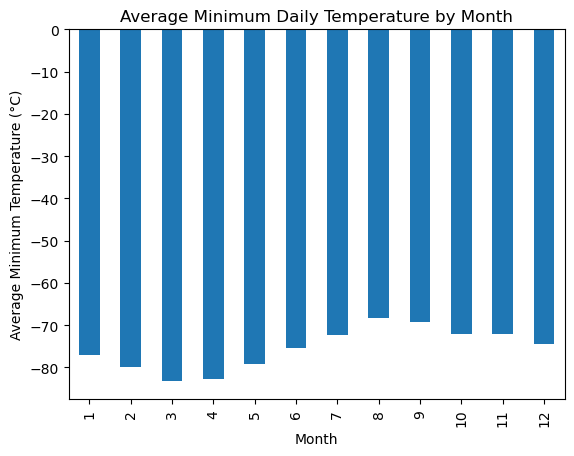

In [22]:
# Plot the average minimum temperature by month
avg_min_temp.plot(kind='bar', title='Average Minimum Daily Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

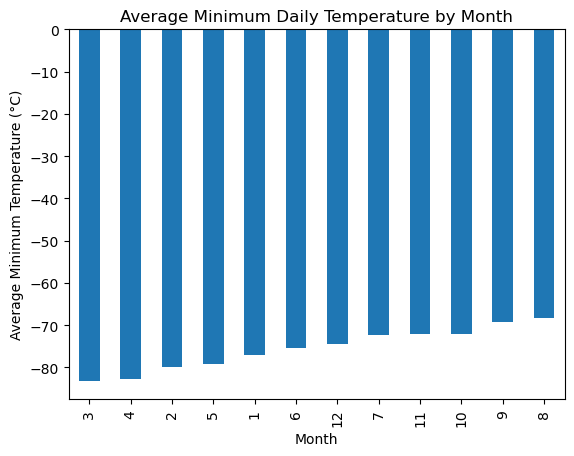

In [23]:
# Identify the coldest and hottest months by sorting the previous graph
avg_min_temp = df.groupby('month')['min_temp'].mean().sort_values()
avg_min_temp.plot(kind='bar', title='Average Minimum Daily Temperature by Month')
plt.xlabel('Month')
plt.ylabel('Average Minimum Temperature (°C)')
plt.show()

In [24]:
# Identify the coldest and hottest months in Curiosity's location by sorting the previous graph
coldest_month = avg_min_temp.idxmin()
warmest_month = avg_min_temp.idxmax()

print(f'The coldest month is {coldest_month} and the warmest month is {warmest_month}.')

The coldest month is 3 and the warmest month is 8.


In [25]:
# What is the average pressure by month?
avg_pressure = df.groupby('month')['pressure'].mean()
print(f'The average pressure by month is {avg_pressure}')

The average pressure by month is month
1     862.488506
2     889.455056
3     877.322917
4     806.329897
5     748.557047
6     745.054422
7     795.105634
8     873.829787
9     913.305970
10    887.312500
11    857.014493
12    842.156627
Name: pressure, dtype: float64


In [26]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
lowest_pressure_month = avg_pressure.idxmin()
highest_pressure_month = avg_pressure.idxmax()

print(f'The month with the lowest atmospheric pressure is {lowest_pressure_month} and the month with the highest atmospheric pressure is {highest_pressure_month}.')

The month with the lowest atmospheric pressure is 6 and the month with the highest atmospheric pressure is 9.


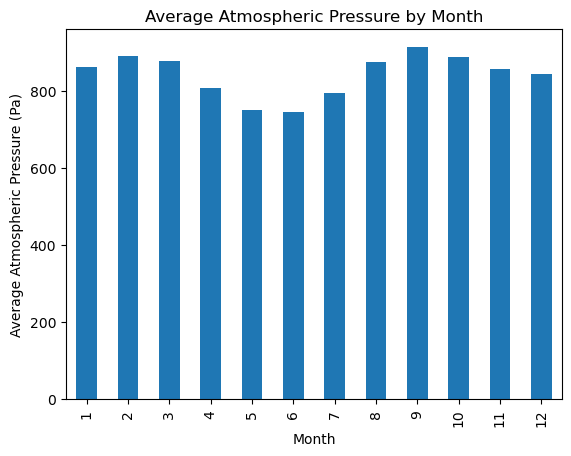

In [27]:
# Plot the average pressure by month
avg_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.show()

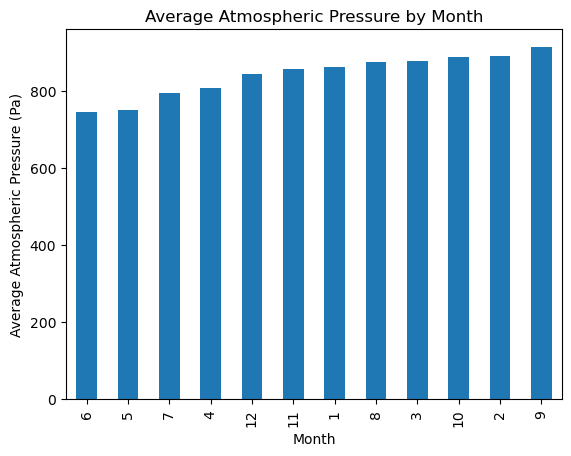

In [28]:
# Identify the lowest and highest pressure months in Curiosity's location by sorting the previous graph
avg_pressure = df.groupby('month')['pressure'].mean().sort_values()
avg_pressure.plot(kind='bar', title='Average Atmospheric Pressure by Month')
plt.xlabel('Month')
plt.ylabel('Average Atmospheric Pressure (Pa)')
plt.show()

A Martian year is approximately 687 Earth days.


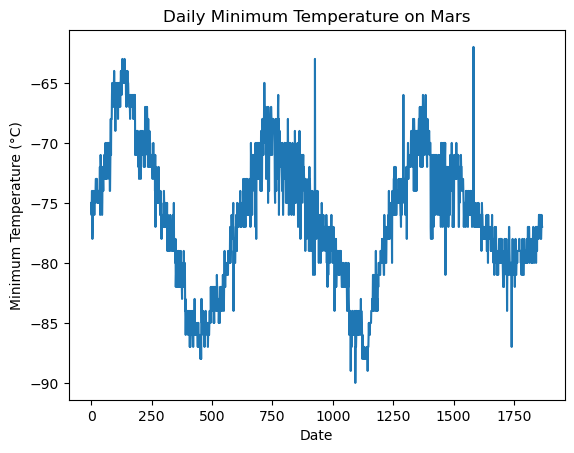

In [29]:
# 5. How many terrestrial (Earth) days are there in a Martian year?
# Visually estimate the result by plotting the daily minimum temperature of each observation in the data set.
# Mars takes about 687 Earth days to orbit the Sun
martian_year_days = 687
print(f'A Martian year is approximately {martian_year_days} Earth days.')

# Plot the daily minimum temperature
df['min_temp'].plot(title='Daily Minimum Temperature on Mars')
plt.xlabel('Date')
plt.ylabel('Minimum Temperature (°C)')
plt.show()

#### Minimum Temperature

The average minimum temperature varies across the months. The lowest temperatures typically occurring in the winter months (e.g., December, January, February).
The highest average minimum temperatures are observed during the summer months (e.g., June, July, August).
This variation can be attributed to seasonal changes and geographical factors affecting the location.

#### Atmospheric Pressure

YOUR ANALYSIS HERE

#### Year Length

Atmospheric pressure is higher in the colder months and lower during warmer months.
The months with the highest average pressure may correlate with stable weather patterns, while lower pressure months could indicate more volatile weather conditions.


### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [34]:
# Write the data to a CSV
df.to_csv('mars_weather_data.csv', index=False)

In [35]:
browser.quit()